## Primo incontro con l'integrazione numerica.

In problemi di dinamica, l'obiettivo è spesso di ottere esprezioni che descrivono il moto di punti materiali. Normalmente, il secondo principio risulta in un espressione del tipo
$$
\frac{d^2 \vec{r}}{dt^2} = \frac{1}{m} \vec{F},
$$
dove $\vec{F}$, la forza risultante sul corpo considerato, può dipendere da tante variabile nel problema (tempo, velocità del corpo, posizione di altri corpi, ...). Metodi numerici devono essere usate quando queste equazioni differenziali non hanno una soluzione analitica. 

Qui dimostriamo l'uso del metodo il più semplice: l'[intregazione di Euler](https://it.wikipedia.org/wiki/Metodo_di_Eulero), per cui usiamo il risultato ottenuto per il moto uniformemente accelerato per piccoli periodi di tempo $\Delta t$. 

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

### Moto uniformemente accelerato

In [2]:
# positione iniziale
r0 = np.array([0, 0])  # (x,y) = (0,0) m

# velocita iniziale
v0 = np.array([5, 5])   # (vx, vy) = (5, 5) m/s

# massa
m = 1. # kg

# accelerazione (costante!)
a = np.array([0, -9.8])  # a = -g ĵ

dt = .001  # 10 ms

r = [r0]
v = [v0]
t = [0.]
for i in range(1200):
    r1 = r[-1] + v[-1]*dt + .5*a*dt*dt
    v1 = v[-1] + a*dt
    r.append(r1)
    v.append(v1)
    t.append(t[-1]+dt)

r = np.array(r)
v = np.array(v)
t = np.array(t)

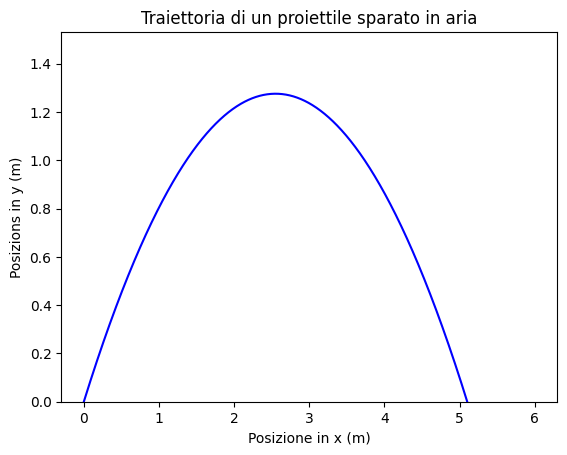

In [3]:
plt.figure()
plt.plot(r[:,0], r[:,1], 'b-')
plt.ylim(0,1.2*r[:,1].max())
plt.xlabel('Posizione in x (m)')
plt.ylabel('Posizions in y (m)')
plt.title('Traiettoria di un proiettile sparato in aria');

## Caduta libera con resistenza dell'aria

In [4]:
# positione iniziale
r0 = np.array([0, 0])  # (x,y) = (0,0) m

# velocita iniziale
v0 = np.array([0, 0])   # (vx, vy) = (5, 5) m/s

# massa
m = 70. # kg

rho = 1.2  # km/m^3
A = 0.5 # m^2
CD = 0.8

# Velocita terminale
vt = np.sqrt(2*m*9.8/(rho*A*CD))

dt = .01  # 10 ms

r = [r0]
v = [v0]
t = [0.]
for i in range(3000):
    # accelerazione
    vp = v[-1]
    vm = np.sqrt(vp[0]**2 + vp[1]**2)
    a = np.array([0, -9.8]) - .5*rho*A*CD*vm*vp/m
    r1 = r[-1] + v[-1]*dt + .5*a*dt*dt
    v1 = v[-1] + a*dt
    r.append(r1)
    v.append(v1)
    t.append(t[-1]+dt)

r = np.array(r)
v = np.array(v)
t = np.array(t)

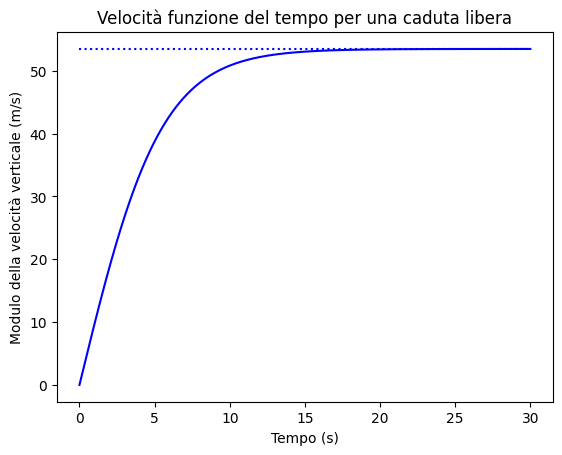

In [5]:
plt.figure()
plt.plot(t, abs(v[:,1]), 'b-') 
plt.plot([t[0], t[-1]], [vt, vt], 'b:')
plt.xlabel('Tempo (s)')
plt.ylabel('Modulo della velocità verticale (m/s)')
plt.title('Velocità funzione del tempo per una caduta libera');

Nota: esiste una soluzione analitica in questo caso:
$$
v(t) = v_{\text{terminale}} \tanh \left(\sqrt{\frac{\rho A C_D g}{2m}} t \right) 
$$

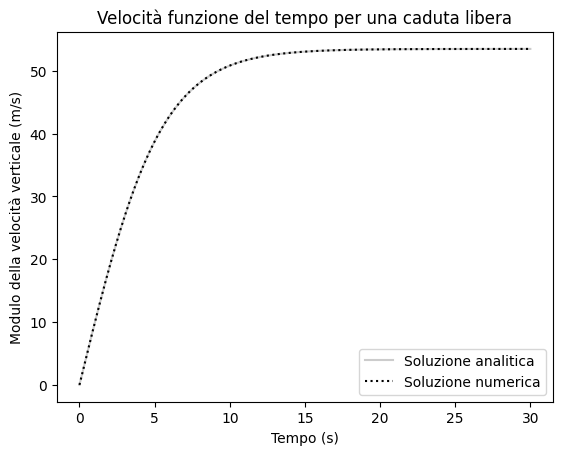

In [6]:
v_teorico = vt * np.tanh(np.sqrt(.5*rho*A*CD*9.8/m) * t)
plt.figure()
plt.plot(t, v_teorico, '-', color=(.8,.8,.8), label='Soluzione analitica')
plt.plot(t, abs(v[:,1]), 'k:', label='Soluzione numerica') 
plt.xlabel('Tempo (s)')
plt.ylabel('Modulo della velocità verticale (m/s)')
plt.title('Velocità funzione del tempo per una caduta libera');
plt.legend();

## Human Cannonball

Utiliziamo lo stesso metodo per il moto in due dimensioni.

In [7]:
# positione iniziale
r0 = np.array([0, 0])  # (x,y) = (0,0) m

# velocita iniziale
v0 = np.array([30, 30])   # (vx, vy) = (5, 5) m/s

# massa
m = 70. # kg

rho = 1.2  # km/m^3
A = 0.5 # m^2


In [8]:
# Con resistenza dell'aria
CD = 0.8
dt = .001  # 10 ms

r = [r0]
v = [v0]
t = [0.]
for i in range(6000):
    # accelerazione
    vp = v[-1]
    vm = np.sqrt(vp[0]**2 + vp[1]**2)
    a = np.array([0, -9.8]) - .5*rho*A*CD*vm*vp/m
    r1 = r[-1] + v[-1]*dt + .5*a*dt*dt
    v1 = v[-1] + a*dt
    r.append(r1)
    v.append(v1)
    t.append(t[-1]+dt)

r_r = np.array(r)
v_r = np.array(v)
t_r = np.array(t)

In [9]:
# Senza
CD = 0.


dt = .001  # 10 ms

r = [r0]
v = [v0]
t = [0.]
for i in range(6000):
    # accelerazione
    vp = v[-1]
    vm = np.sqrt(vp[0]**2 + vp[1]**2)
    a = np.array([0, -9.8]) - .5*rho*A*CD*vm*vp/m
    r1 = r[-1] + v[-1]*dt + .5*a*dt*dt
    v1 = v[-1] + a*dt
    r.append(r1)
    v.append(v1)
    t.append(t[-1]+dt)

r = np.array(r)
v = np.array(v)
t = np.array(t)

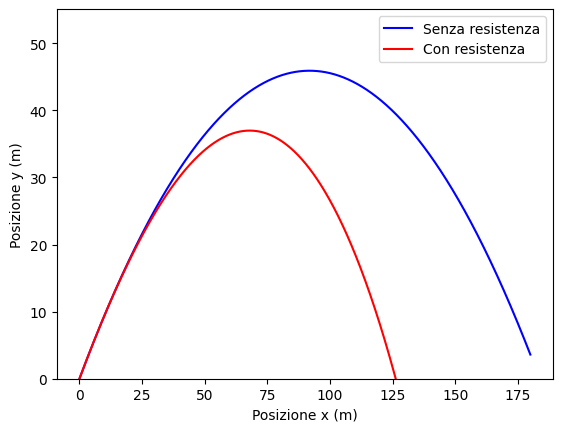

In [10]:
plt.figure()
plt.plot(r[:,0], r[:,1], 'b-', label='Senza resistenza')
plt.plot(r_r[:,0], r_r[:,1], 'r-', label='Con resistenza')
plt.xlabel('Posizione x (m)')
plt.ylabel('Posizione y (m)')
plt.ylim(0, 1.2*r[:,1].max()) 
plt.legend()
